# **Analisis Penjualan Rumah di Kabupaten Malang (Lamudi Indonesia)**

- Nama        : Lingga Rizki Mandala
- Email       : linggarizkim@gmail.com
- TETRIS-ID   : TETRIS-098
- Project     : DQLab TETRIS Batch 4 Capstone Project

## **Menentukan Pertanyaan Bisnis**

1. Berapa banyak penjualan rumah di Kabupaten Malang pada Lamudi Indonesia?
2. Berapa harga rumah di Kabupaten Malang?
3. Berapa banyak status agen properti Lamudi Indonesia di Kabupaten Malang?
4. Berapa banyaknya agen properti Lamudi Indonesia di Kabupaten Malang dan perbandingan terhadap status agennya?
5. Bagaimana korelasi penjualan rumah antara harga, luas bangunan, dan luas tanah?
6. Bagaimana hubungan antara banyaknya kamar tidur terhadap luas bangunan?

## **Menyiapkan library yang dibutuhkan** 

In [1]:
#library data analisis dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## **Data Wrangling**

### Load Dataset

Hasil dataset yang diambil dari webscraping lamudi.co.id

In [2]:
df = pd.read_csv('data/lamudi_malang_house.csv', encoding='ISO-8859-1')
df.head()

,title,location,detail,price,agent_name,agent_status,description
0,Rumah mewah termurah dekat kampus brawijaya,"Dinoyo, Malang",3 Kamar tidur ...,Rp662.000.000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,"Tulusrejo, Malang",10 Kamar tidur ...,Rp2.500.000.000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...
2,di jual rumah kost Exclusive kota malang Suhat...,"Lowokwaru, Malang",10 Kamar tidur ...,Rp2.900.000.000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,"Lowokwaru, Malang",2 Kamar tidur ...,Rp589.000.000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...
4,Dijual Rumah Butuh uang segera luas 231m di p...,"Blimbing, Malang",3 Kamar tidur ...,Rp650.000.000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2958 non-null   object
 1   location      2958 non-null   object
 2   detail        2958 non-null   object
 3   price         2958 non-null   object
 4   agent_name    2958 non-null   object
 5   agent_status  2958 non-null   object
 6   description   2958 non-null   object
dtypes: object(7)
memory usage: 161.9+ KB


In [4]:
print('Dataset terdiri dari', df.shape[0], 'baris dan', df.shape[1], 'kolom')

Dataset terdiri dari 2958 baris dan 7 kolom


Karena dataset diambil dari web scraping dan masih kotor, baiknya adalah kita melakukan assessing data untuk melihat null value dan data duplikat, serta melakukan cleaning untuk tahapan selanjutnya pada EDA.

### Assessing Data   

Mengecek null value dan data duplikat

In [5]:
df.isnull().sum()

title           0
location        0
detail          0
price           0
agent_name      0
agent_status    0
description     0
dtype: int64

In [6]:
print('Dataset mempunyai data duplikat sebanyak:', df.duplicated().sum())

Dataset mempunyai data duplikat sebanyak: 355


Dataset kotor tidak mempunyai null value dan mempunya data duplikat sebanyak 355 baris. Tahapan selanjutnya adalah melakukan cleaning data.

### Cleaning Data

Memecah location menjadi Kecamatan dan Kabupaten

In [7]:
df[['kecamatan', 'kabupaten']] = df['location'].str.split(r',', expand=True)
df = df.drop(['location'], axis=1)
df.head()

,title,detail,price,agent_name,agent_status,description,kecamatan,kabupaten
0,Rumah mewah termurah dekat kampus brawijaya,3 Kamar tidur ...,Rp662.000.000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...,Dinoyo,Malang
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,10 Kamar tidur ...,Rp2.500.000.000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...,Tulusrejo,Malang
2,di jual rumah kost Exclusive kota malang Suhat...,10 Kamar tidur ...,Rp2.900.000.000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...,Lowokwaru,Malang
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,2 Kamar tidur ...,Rp589.000.000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...,Lowokwaru,Malang
4,Dijual Rumah Butuh uang segera luas 231m di p...,3 Kamar tidur ...,Rp650.000.000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...,Blimbing,Malang


Mengubah nilai pada kolom detail dan price

In [8]:
def cleaning(data):
    data = re.sub(r'[.,?]', " ", data)
    data = re.sub(r'[Rp|m²|Â|Lahan]', '', data)
    data = re.sub(r'\s+', '', data)
    return data

# mengubah nilai pada kolom price dan detail
df['price'] = df['price'].apply(cleaning)
df['detail'] = df['detail'].apply(cleaning)
df.head()

,title,detail,price,agent_name,agent_status,description,kecamatan,kabupaten
0,Rumah mewah termurah dekat kampus brawijaya,3Krtidur60Bgu69,662000000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...,Dinoyo,Malang
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,10Krtidur250Bgu103,2500000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...,Tulusrejo,Malang
2,di jual rumah kost Exclusive kota malang Suhat...,10Krtidur300Bgu103,2900000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...,Lowokwaru,Malang
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,2Krtidur36Bgu72,589000000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...,Lowokwaru,Malang
4,Dijual Rumah Butuh uang segera luas 231m di p...,3Krtidur231Bgu231,650000000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...,Blimbing,Malang


Memecah kolom detail menjadi kolom kamar tidur, luas bangunan, dan luas lahan

In [9]:
df[['kamar tidur', 'luas bangunan', 'luas lahan']] = df['detail'].str.split(r"Krtidur|Bgu", expand=True)
df = df.drop(['detail'], axis = 1)
df.head()

,title,price,agent_name,agent_status,description,kecamatan,kabupaten,kamar tidur,luas bangunan,luas lahan
0,Rumah mewah termurah dekat kampus brawijaya,662000000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...,Dinoyo,Malang,3,60,69
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,2500000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...,Tulusrejo,Malang,10,250,103
2,di jual rumah kost Exclusive kota malang Suhat...,2900000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...,Lowokwaru,Malang,10,300,103
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,589000000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...,Lowokwaru,Malang,2,36,72
4,Dijual Rumah Butuh uang segera luas 231m di p...,650000000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...,Blimbing,Malang,3,231,231


Mengubah tipe data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2958 non-null   object
 1   price          2958 non-null   object
 2   agent_name     2958 non-null   object
 3   agent_status   2958 non-null   object
 4   description    2958 non-null   object
 5   kecamatan      2958 non-null   object
 6   kabupaten      2757 non-null   object
 7   kamar tidur    2958 non-null   object
 8   luas bangunan  2958 non-null   object
 9   luas lahan     2956 non-null   object
dtypes: object(10)
memory usage: 231.2+ KB


Konversi tipe data price

In [11]:
try:
    df['price'] = df['price'].astype('int64')
except ValueError:
    print("Konversi tipe data gagal.")

Konversi tipe data kamar tidur

In [12]:
try:
    df['kamar tidur'] = df['kamar tidur'].astype('int64')
except ValueError:
    print("Konversi tipe data gagal.")

Konversi tipe data luas lahan

In [13]:
try:
    df['luas lahan'] = df['luas lahan'].astype('float64')
except ValueError:
    print("Konversi tipe data gagal.")

Konversi tipe data luas bangunan

In [14]:
try:
    df['luas bangunan'] = df['luas bangunan'].astype('int64')
except ValueError:
    print("Konversi tipe data gagal.")


Konversi tipe data gagal.


In [15]:
numeric_values = pd.to_numeric(df['luas bangunan'], errors='coerce')

# Mengganti kolom 'integer_column' dengan nilai numerik
df['luas bangunan'] = numeric_values

# Menghapus baris yang mengandung nilai non-numeric
df.dropna(subset=['luas bangunan'], inplace=True)

Melihat kembali hasil konversi tipe data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 0 to 2957
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2956 non-null   object 
 1   price          2956 non-null   int64  
 2   agent_name     2956 non-null   object 
 3   agent_status   2956 non-null   object 
 4   description    2956 non-null   object 
 5   kecamatan      2956 non-null   object 
 6   kabupaten      2756 non-null   object 
 7   kamar tidur    2956 non-null   int64  
 8   luas bangunan  2956 non-null   float64
 9   luas lahan     2956 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 254.0+ KB


Setelah melakukan cleaning data, terdapat null value pada kolom Kabupaten. Karena disini difokuskan untuk Kabupaten Malang dan tidak ada nilai lain, maka kita abaikan saja untuk null valuenya. Di bawah ini akan mengecek apakah ada duplikat data dan akan di hapus apabila terdapat data duplikat.

Menghapus duplikasi data

In [17]:
print('Duplikasi data sebelum penghapusan:', df.duplicated().sum())

#drop duplikat data
df = df.drop_duplicates()

print('Hasil duplikasi data setelah penghapusan:', df.duplicated().sum())

Duplikasi data sebelum penghapusan: 355
Hasil duplikasi data setelah penghapusan: 0


Mengisi null value pada kolom Kabupaten

In [18]:
#df['kota'] = df['kota'].fillna('Malang')
#df.isnull().sum()

Tidak perlu mengisi nilai yang kosong pada kolom Kabupaten, sehingga diabaikan saja.

## **Exploratory Data Analysis (EDA)**

### Statistical Summary

Hasil dataset setelah proses cleaning

In [19]:
df.head()

,title,price,agent_name,agent_status,description,kecamatan,kabupaten,kamar tidur,luas bangunan,luas lahan
0,Rumah mewah termurah dekat kampus brawijaya,662000000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...,Dinoyo,Malang,3,60.0,69.0
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,2500000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...,Tulusrejo,Malang,10,250.0,103.0
2,di jual rumah kost Exclusive kota malang Suhat...,2900000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...,Lowokwaru,Malang,10,300.0,103.0
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,589000000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...,Lowokwaru,Malang,2,36.0,72.0
4,Dijual Rumah Butuh uang segera luas 231m di p...,650000000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...,Blimbing,Malang,3,231.0,231.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2601 entries, 0 to 2957
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2601 non-null   object 
 1   price          2601 non-null   int64  
 2   agent_name     2601 non-null   object 
 3   agent_status   2601 non-null   object 
 4   description    2601 non-null   object 
 5   kecamatan      2601 non-null   object 
 6   kabupaten      2424 non-null   object 
 7   kamar tidur    2601 non-null   int64  
 8   luas bangunan  2601 non-null   float64
 9   luas lahan     2601 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 223.5+ KB


Hasil pengamatan:
1. Dataset terdiri dari 10 kolom dan 2601 baris.
2. Dataset memiliki 4 kolom numerik dan 6 kolom kategorik
3. Adanya null value pada kolom Kota diabaikan, karena kolom tersebut hanya value Malang dan tidak ada yang lain. Sehingga kita abaikan saja.

Memisahkan dataset kategorikal dan numerikal

In [21]:
cats = ['agent_status', 'kecamatan', 'kabupaten']
nums = ['price', 'kamar tidur', 'luas bangunan', 'luas lahan']

Mendeskripsikan hasil dataset kategorikal dan numerikal

In [22]:
df[cats].describe()

,agent_status,kecamatan,kabupaten
count,2601,2601,2424
unique,3,59,1
top,Rekan Lamudi Pro,Lowokwaru,Malang
freq,1316,645,2424


- agent_status mempunyai 3 nilai, yaitu agent, rekan lamudi, dan rekan lamudi pro.
- kecamatan mempunyai 59 nilai, dimana kita akan memfokuskan pada kecamatan di wilayah Kabupaten Malang.
- kabupaten mempunyai 1 nilai, yaitu Malang.

In [23]:
df[nums].describe()

,price,kamar tidur,luas bangunan,luas lahan
count,2.601000e+03,2601.000000,2601.000000,2601.000000
mean,2.153793e+09,4.161476,165.018839,166.308727
std,3.603316e+09,3.767073,244.655354,204.369312
min,1.000000e+08,1.000000,1.000000,1.000000
25%,5.990000e+08,2.000000,56.000000,72.000000
50%,1.050000e+09,3.000000,100.000000,104.000000
75%,2.300000e+09,4.000000,200.000000,179.000000
max,4.000000e+10,70.000000,8000.000000,2672.000000


Pada kolom numerik, tidak adanya nilai negatif.
- kolom price mempunyai nilai minimum 100.000.000 (100 juta) dan nilai maksimum 40.000.000.000 (40 miliar).
- kolom kamar tidur mempunyai nilai minimum 1 dan nilai maksimum 70.
- kolom luas bangunan mempunyai nilai minimum 1 dan nilai maksimum 8000.
- kolom luas lahan mempunyai nilai minimum 1 dan nilai maksimum 2672.

Untuk lebih memahaminya, akan kita tampilkan univariate analysis dan multivariate analysis pada tahap selanjutnya.

### Univariate Analysis

#### Boxplot (numerikal)

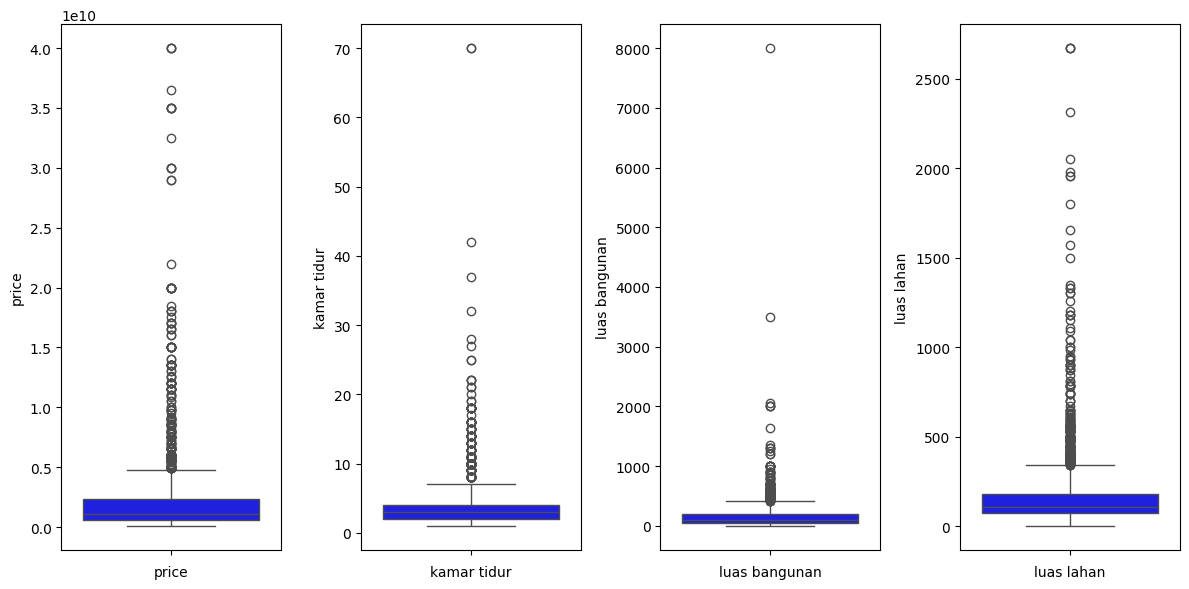

In [24]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.xlabel(nums[i])
    plt.tight_layout()

#### Distribution plot (numerikal)

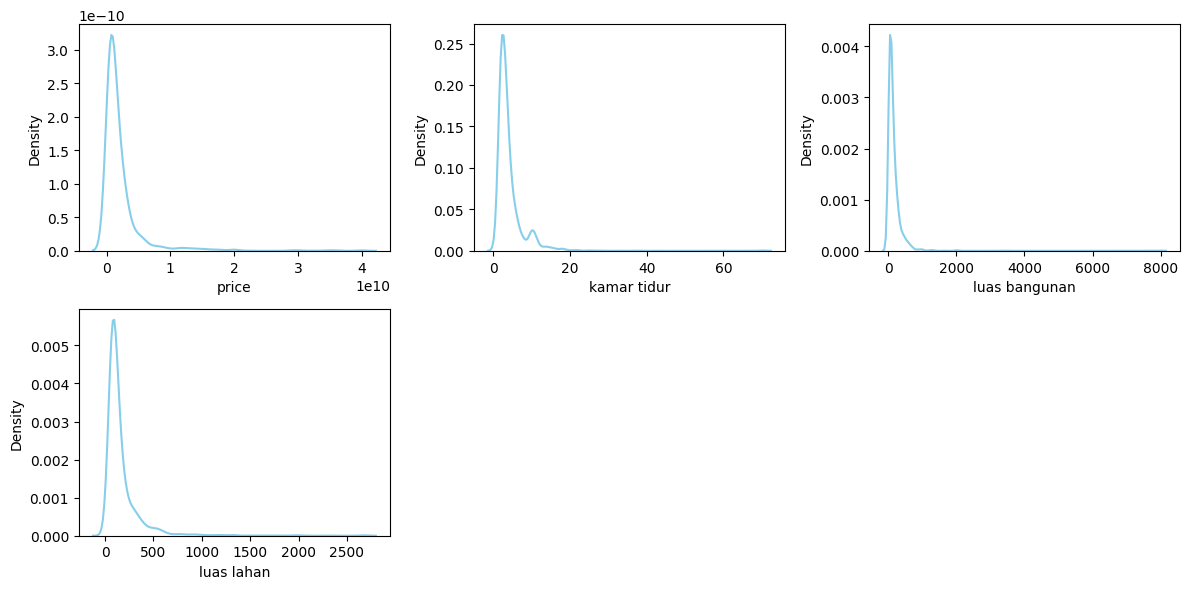

In [25]:
plt.figure(figsize=(12,6))

features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Hasil Pengamatan:
1. terdapat outlier pada kolom numerik
2. distribusi kolom numerik cenderung skewness

Setelah diamati pada gambar, dataset ini banyak nilai ekstrim khususnya pada kolom numerik. Tahap selanjutnya adalah mengamati kolom kategorik.

#### Count plot (kategorikal)

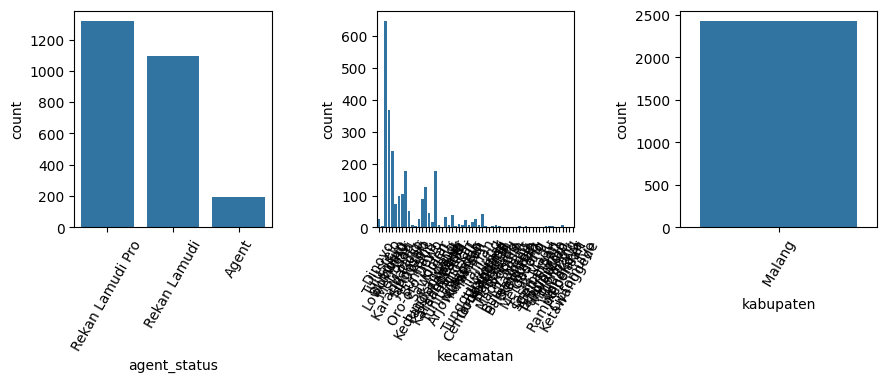

In [26]:
plt.figure(figsize=(12,10))
for i in range(0, len(cats)):
    plt.subplot(3, 4, i+1)
    sns.countplot(x=df[cats[i]])
    plt.xlabel(cats[i])
    plt.xticks(rotation=60)
    plt.tight_layout()

Hasil pengamatan : 
1. agent_status merupakan salah satu entitas yang terdapat pada platform lamudi, yaitu layanan yang diberikan oleh platform lamudi kepada agen penjualan. Perbedaannya hanya terdapat pada fitur dan layanan saja. Rekan Lamudi Pro adalah status tertinggi daripada yang lain, seperti member premium pada umumnya.

2. banyaknya kecamatan di Kabupaten Malang tidak bisa memperlihatkan semuanya, sehingga keterangan pada kabupaten menjadi tidak jelas. Untuk lebih memahaminya nanti akan dijabarkan pada explanatory analysis.

3. dataset ini difokuskan untuk Kabupaten Malang saja, sehingga kolom ini tidak terdapat value lain.

### Multivariate Analysis

Heatmap

<Axes: >

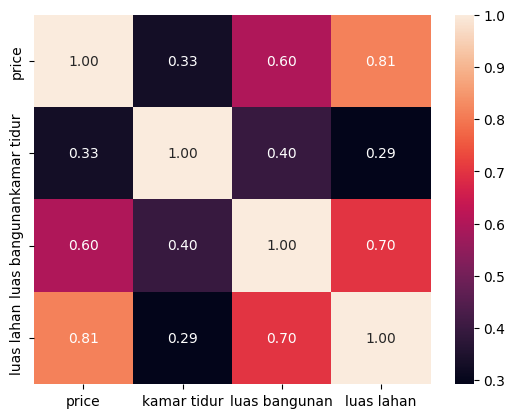

In [27]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f")

Hasil pengamatan :
1. korelasi price terhadap luas lahan sangat kuat.
2. korelasi antara price dengan luas bangunan kuat.
3. korelasi luas bangunan terhadap luas lahan juga kuat.

Hasil pengamatan EDA, ditemukan banyak outlier pada kolom numerikal, sehingga mempengaruhi explanatory analysis nantinya. Alangkah baiknya kita melakukan cleaning data lagi untuk membersihkan dataset ini.

### Cleaning Data (after EDA)

Pada tahapan ini, kita akan menghapus nilai outlier pada kolom numerikal dan mengecek apakah hasil cleaning data lebih baik.

**Menghapus nilai outlier pada kolom numerik**

In [28]:
def remove_outliers_iqr(df, nums):
    Q1 = df[nums].quantile(0.25)
    Q3 = df[nums].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df_no_outliers = df.loc[~((df[nums] < lower_bound) | (df[nums] > upper_bound)).any(axis=1)]
    return df_no_outliers

df = remove_outliers_iqr(df, nums)

In [29]:
# # metode transformasi logaritmik (not effective)
# df['price_transform'] = np.log(df['price'])
# df['kamar_tidur_transform'] = np.log(df['kamar tidur'])
# df['luas_bangunan_transform'] = np.log(df['luas bangunan'])
# df['luas_lahan_transform'] = np.log(df['luas lahan'])

In [30]:
## metode transformasi box-cox (not effective)
#from scipy.stats import boxcox

# price_transform, _ = boxcox(df['price'])
# kamar_tidur_transform, _ = boxcox(df['kamar tidur'])
# luas_bangunan_transform, _ = boxcox(df['luas bangunan'])
# luas_lahan_transform, _ = boxcox(df['luas lahan'])

# df['price_transform'] = price_transform
# df['kamar_tidur_transform'] = kamar_tidur_transform
# df['luas_bangunan_transform'] = luas_bangunan_transform
# df['luas_lahan_transform'] = luas_lahan_transform

### EDA (after cleaning data)

#### Summary

In [31]:
df.describe()

,price,kamar tidur,luas bangunan,luas lahan
count,2.067000e+03,2067.000000,2067.000000,2067.000000
mean,1.127370e+09,2.946783,102.063377,111.898403
std,8.799133e+08,1.138124,71.869378,59.938540
min,1.000000e+08,1.000000,1.000000,1.000000
25%,5.000000e+08,2.000000,50.000000,70.000000
50%,8.150000e+08,3.000000,78.000000,90.000000
75%,1.500000e+09,3.000000,138.000000,135.000000
max,4.800000e+09,7.000000,400.000000,339.000000


Hasil pengamatan :
1. kolom price mempunyai nilai maksimum 4.800.000.000 (4,8 miliar).
2. kolom kamar tidur mempunyai nilai maksimum 7. 
3. luas bangunan maksimum yang ada adalah 400.
4. luas lahan maksimum yang ada adalah 339.

Untuk lebih memahaminya bisa dilihat pada gambar di bawah ini.

#### Distribution plot (Univariate Analysis)

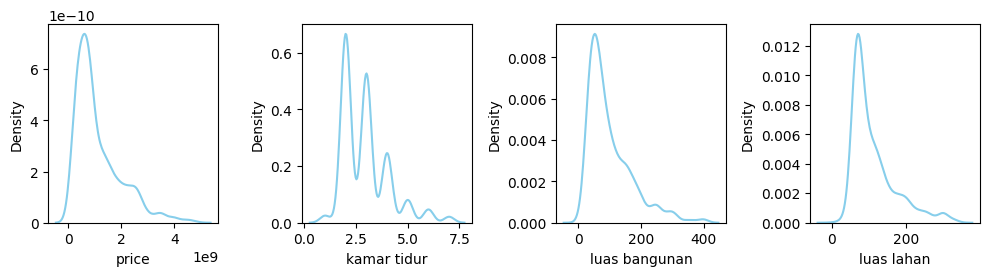

In [32]:
# features = ['price', 'kamar tidur', 'luas bangunan', 'luas lahan', 'price_transform', 'kamar_tidur_transform', 'luas_bangunan_transform', 'luas_lahan_transform']
features = ['price', 'kamar tidur', 'luas bangunan', 'luas lahan']

plt.figure(figsize=(10,5))
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

#### Box plot (Univariate Analysis)

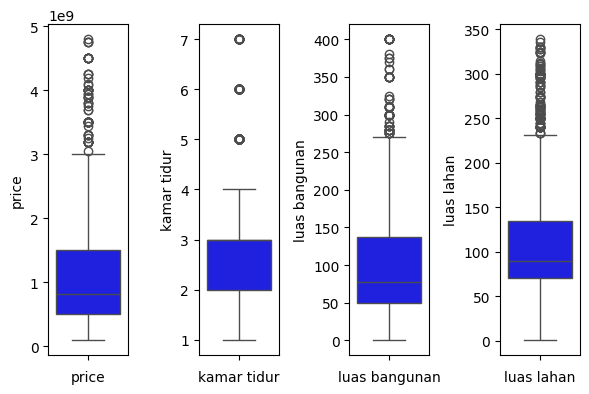

In [33]:
plt.figure(figsize=(6,15))
for i in range(0, len(features)):
    plt.subplot(4,len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.xlabel(features[i])
    plt.tight_layout()

Hasil pengamatan :
1. Masih adanya nilai outlier, namun tidak sebanyak sebelum cleaning outlier. Karena kita akan menganalisis dan bukan memprediksi, kita abaikan saja.

Di bawah ini kita akan lihat bagaimana hubungan antara keempat kolom setelah cleaning data.

#### Heatmap (Multivariate Analysis)

<Axes: >

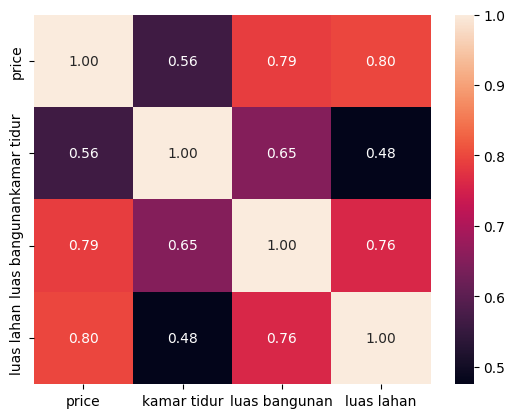

In [34]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f")

Hasil pengamatan :
1. korelasi price terhadap luas lahan sangat kuat.
2. korelasi antara price dengan luas bangunan sangat kuat.
3. korelasi luas bangunan terhadap luas lahan juga kuat.
4. korelasi kuat antara kamar tidur dengan luas bangunan. Padahal sebelum menghapus outlier, korelasi kedua ini tidak begitu kuat.

## **Visualization & Explanatory Analysis**

### 1. Berapa banyak penjualan rumah di Kabupaten Malang pada Lamudi Indonesia?

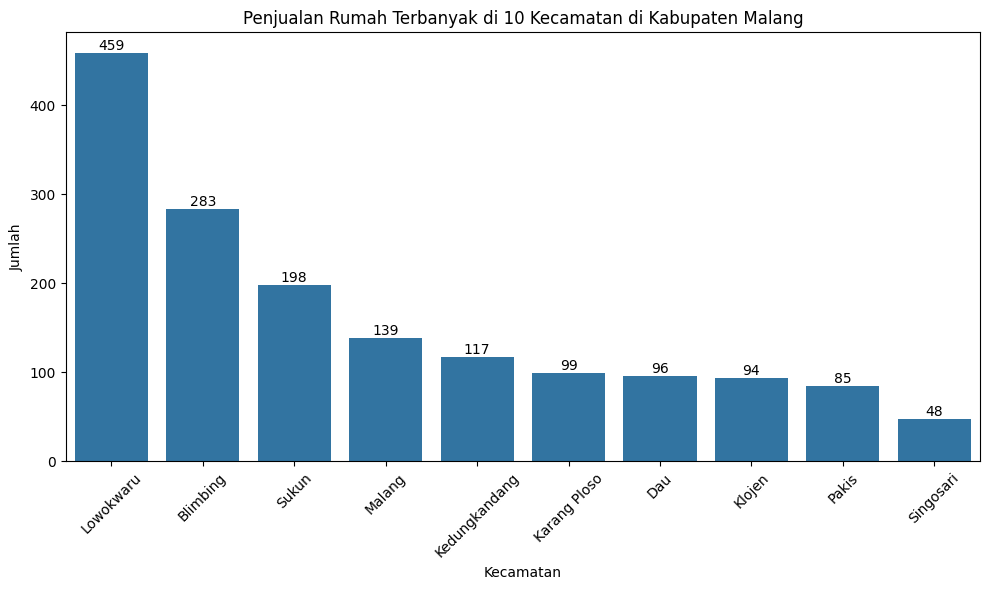

In [35]:
kecamatan = df['kecamatan'].value_counts().head(10)
top_10_kecamatan = df[df['kecamatan'].isin(kecamatan.index)]

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=top_10_kecamatan, x='kecamatan', order=kecamatan.index)
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=10)
plt.title('Penjualan Rumah Terbanyak di 10 Kecamatan di Kabupaten Malang')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kecamatan Lowokwaru mendominasi penjualan rumah di lamudi.co.id sebesar 459 unit. Kemudian disusul kecamatan Blimbing dengan jumlah 283 unit dan Kecamatan Sukun sebesar 198 unit. Adapun penjualan rumah di kecamatan Malang dan Kedungkandang masing-masing sebesar 139 dan 117 unit.

### 2. Berapa harga rumah di Kabupaten Malang?

Kita akan mengetahui harga minimum, harga rata-rata, dan harga maksimum rumah di Kabupaten Malang berikut.

In [36]:
price_min = df['price'].min()
price_mean = df['price'].mean()
price_max = df['price'].max()

print('Harga minimum rumah di Kabupaten Malang adalah Rp', price_min)
print('Harga rerata rumah di Kabupaten Malang adalah Rp', price_mean)
print('Harga maksimum rumah di Kabupaten Malang adalah Rp', price_max)

Harga minimum rumah di Kabupaten Malang adalah Rp 100000000
Harga rerata rumah di Kabupaten Malang adalah Rp 1127369502.229318
Harga maksimum rumah di Kabupaten Malang adalah Rp 4800000000


Hasil pengamatan adalah harga rumah di Kabupaten Malang harga minimum yaitu Rp. 100 juta dan harga maksimum yaitu Rp. 4.8 miliar. Dengan harga rerata rumah yaitu Rp. 1.127.369.502,23 Bagaimana dengan jenis rumah harga minimum dan maksimum? Akan kita lampirkan di bawah ini.

In [37]:
index_price_min = df.loc[(df['price'] == price_min)]
index_price_max = df.loc[(df['price'] == price_max)]

In [38]:
print('Data untuk harga minimum rumah')
print(index_price_min)

Data untuk harga minimum rumah
                                      title      price      agent_name  \
2928  Dipasarkan Rumah Subsidi Murah Malang  100000000  Iklan Plazza08   

          agent_status                                        description  \
2928  Rekan Lamudi Pro  Rumah Murah bersubsidi  Lokasi strategis mudah...   

      kecamatan kabupaten  kamar tidur  luas bangunan  luas lahan  
2928  Sawojajar    Malang            2           25.0        60.0  


In [39]:
title = df[df['price'] == price_min]['title']
desc = df[df['price'] == price_min]['description']

for text in (title):
    print(text)
    
for text in (desc):
    print(text)

Dipasarkan Rumah Subsidi Murah Malang
Rumah Murah bersubsidi  Lokasi strategis mudah dijangkau DP bisa dicicil  Lokasi dekat kawasan Oma View Kota Malang (Jarak asli sesuai google maps) - 3 menit ke Oma View - 10 menit ke Gerbang Tol Kota Malang - 5 menit ke Indomart Kedungrejo - 5 menit ke SDN 1 Cemorokandang - 5 menit ke SMKN 9 Malang - 13 menit ke Kampus 2 Universitas Negeri Malang - 17 menit ke Rumah Sakit Puri Bunda - 22 menit ke Bandara Abdulrachman Saleh  Skema pembayaran : > DP bisa dicicil > KPR Subsidi Pemerintah Angsuran FLAT sampai LUNAS  Saat ini proses pembangunan 65 unit rumah  PROSES PENGEMBANGAN DI TAHAP 2 HINGGA 195 UNIT LAGI  Unit terbatas.   Buruan booking mumpung masih murah  Informasi Selanjutnya Hubungi marketing office kami dinomor tertera


Dipasarkan Rumah Subsidi Murah Malang

Rumah Murah bersubsidi  Lokasi strategis mudah dijangkau DP bisa dicicil  Lokasi dekat kawasan Oma View Kota Malang (Jarak asli sesuai google maps) - 3 menit ke Oma View - 10 menit ke Gerbang Tol Kota Malang - 5 menit ke Indomart Kedungrejo - 5 menit ke SDN 1 Cemorokandang - 5 menit ke SMKN 9 Malang - 13 menit ke Kampus 2 Universitas Negeri Malang - 17 menit ke Rumah Sakit Puri Bunda - 22 menit ke Bandara Abdulrachman Saleh  Skema pembayaran : > DP bisa dicicil > KPR Subsidi Pemerintah Angsuran FLAT sampai LUNAS  Saat ini proses pembangunan 65 unit rumah  PROSES PENGEMBANGAN DI TAHAP 2 HINGGA 195 UNIT LAGI  Unit terbatas.   Buruan booking mumpung masih murah  Informasi Selanjutnya Hubungi marketing office kami dinomor tertera

Rumah dengan harga minimum (Rp 100 juta) yaitu terletak di Kecamatan Sawojajar Kabupaten Malang. Terlihat bahwa rumah tersebut adalah rumah subsidi murah Malang dengan luas lahan 60 m² dan luas bangunan 25 m² serta mempunyai 2 kamar tidur. Untuk melihat properti lebih lanjut bisa mengakses link di bawah ini.

https://www.lamudi.co.id/dipasarkan-rumah-subsidi-murah-malang-169257392235.html

In [40]:
print('Data untuk harga maksimum rumah')
print(index_price_max)

Data untuk harga maksimum rumah
                                                  title       price  \
1795  RUMAH BESAR DAN MEWAH DI KAWASAN BUNGA BUNGA S...  4800000000   

        agent_name      agent_status  \
1795  Dinova Rafli  Rekan Lamudi Pro   

                                            description  kecamatan kabupaten  \
1795  DI SEWAKAN cepat rumah bunga merak 1 dewandaru...  Lowokwaru    Malang   

      kamar tidur  luas bangunan  luas lahan  
1795            5          400.0       328.0  


In [41]:
title = df[df['price'] == price_max]['title']
desc = df[df['price'] == price_max]['description']

for text in (title):
    print(text)
    
for text in (desc):
    print(text)

RUMAH BESAR DAN MEWAH DI KAWASAN BUNGA BUNGA SOEKARNO HATTA MALANG
DI SEWAKAN cepat rumah bunga merak 1 dewandaru Soekarno Hatta Malang Luas tanah 328 m2 Luas bangunan 400 m2 Setengah lantai dua Diatas 2 kamar tidur plus kamar mandi dalam plus AC ruangan Ruang keluarga  Tempat jemuran dan gudang kecil Dilantai satu kamar tidur ada 2 kamar tidur plus kamar mandi dalam 1 kamar tidur tamu  2 kamar tidur pembantu  1 kamar mandi luar 2 dapur  2 ruang makan 2 ruang tamu  Kolam ikan dan taman bunga Teras rumah Garasi muat 3 mobil ,masuk 2 ,diluar garasi 1 di depan carport teras rumah


RUMAH BESAR DAN MEWAH DI KAWASAN BUNGA BUNGA SOEKARNO HATTA MALANG

DI SEWAKAN cepat rumah bunga merak 1 dewandaru Soekarno Hatta Malang Luas tanah 328 m2 Luas bangunan 400 m2 Setengah lantai dua Diatas 2 kamar tidur plus kamar mandi dalam plus AC ruangan Ruang keluarga  Tempat jemuran dan gudang kecil Dilantai satu kamar tidur ada 2 kamar tidur plus kamar mandi dalam 1 kamar tidur tamu  2 kamar tidur pembantu  1 kamar mandi luar 2 dapur  2 ruang makan 2 ruang tamu  Kolam ikan dan taman bunga Teras rumah Garasi muat 3 mobil ,masuk 2 ,diluar garasi 1 di depan carport teras rumah

Selanjutnya rumah dengan harga maksimum (Rp 4.8 miliar) yaitu terletak di Kecamatan Lowokwaru Kabupaten Malang. Rumah dengan banyaknya 5 kamar tidur, luas lahan 328 m² dan luas bangunan 400 m² terletak di jalan Bunga Merak 1 Dewandaru kecamatan Lowokwaru. Diketahui bahwa kawasan ini terletak di jalan raya Soekarno Hatta dan dekat dengan kampus Universitas Brawijaya. Setelah melakukan penelusuran, ternyata tidak ditemukan rumah ini di website lamudi.co.id, namun ditemukan di website lain. Untuk lebih lanjut bisa mengakses link di bawah ini.

https://www.rumah123.com/properti/malang/hos14972891/

Mengecek harga rumah dengan kecamatan di Kabupaten Malang

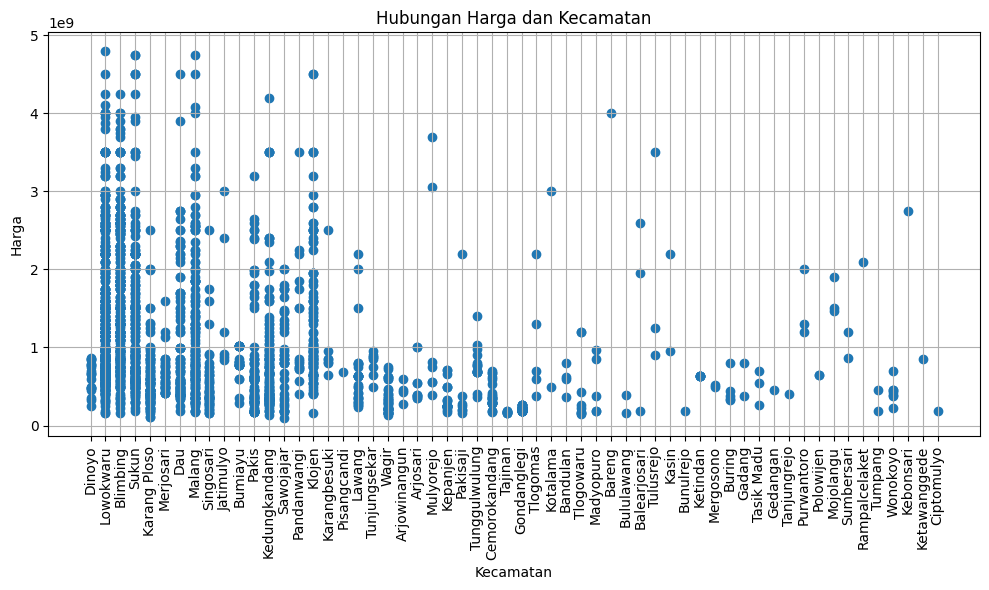

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df['kecamatan'], df['price'])
plt.title('Hubungan Harga dan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Harga')
plt.xticks(rotation=90)  # Untuk memutar label kecamatan agar lebih mudah dibaca
plt.grid(True)
plt.tight_layout()
plt.show()

Kecamatan Lowokwaru, Blimbing, dan Sukun yang mempunyai banyaknya penjualan rumah ternyata mempunyai harga yang beragam. Harga yang ditawarkan mulai dari di bawah 1 miliar rupiah hingga 3 miliar rupiah.

### 3. Berapa banyak agen properti Lamudi Indonesia di Kabupaten Malang?

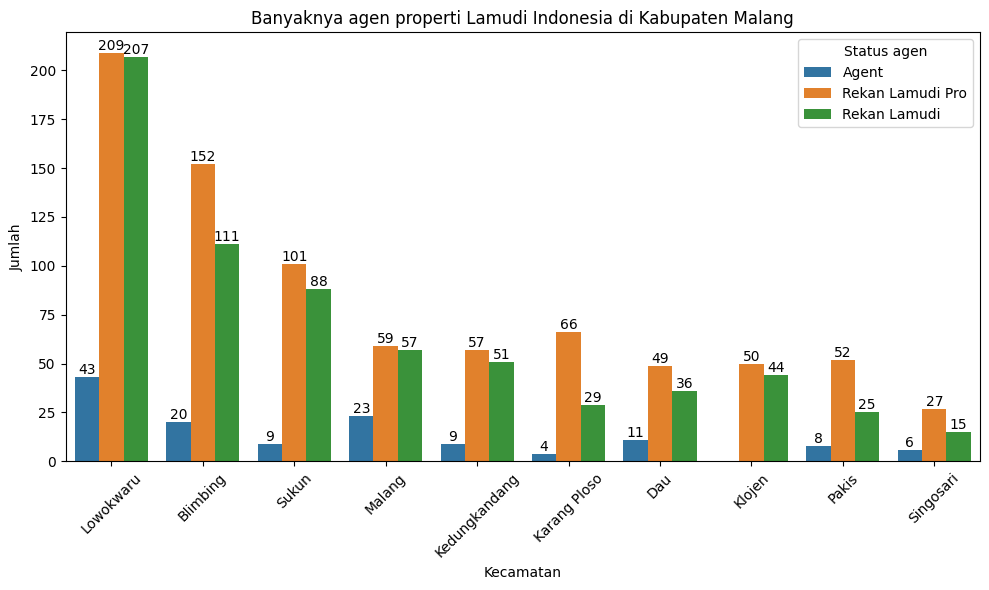

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=top_10_kecamatan, x='kecamatan', hue='agent_status', order=kecamatan.index)
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=10)
ax.bar_label(ax.containers[1], fmt='%.0f', fontsize=10)
ax.bar_label(ax.containers[2], fmt='%.0f', fontsize=10)
plt.title('Banyaknya agen properti Lamudi Indonesia di Kabupaten Malang')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Status agen')
plt.tight_layout()
plt.show()

Terlihat bahwa status rekan lamudi pro dan rekan lamudi mendominasi agen penjualan rumah di website ini. Dengan fasilitas yang diberikan oleh lamudi dapat menguntungkan agen rekan lamudi, salah satunya adalah membantu agen penjualan rumah untuk mendapatkan calon pembeli yang berminat dan ingin mendapatkan rumah secara cepat.

Bisa dilihat bahwa kecamatan Lowokwaru mendominasi banyaknya agen di lamudi.co.id. Antara rekan lamudi pro dengan rekan lamudi berbeda 2 orang saja. Selanjutnya pada kecamatan Blimbing selisih jauh antara rekan lamudi pro dan rekan lamudi dengan perbedaan 41 orang. Begitu juga dengan kecamatan lain yang mendominasi rekan lamudi pro dalam penjualan rumah di kabupaten Malang ini.

Bagaimana dengan agen lamudi yang paling banyak melisting penjualan rumah di lamudi.co.id? Kita akan lihat di bawah ini.

### 4. Berapa banyaknya agen Lamudi Indonesia Kabupaten Malang yang terdapat pada dataset beserta perbandingan terhadap status agennya?

Mencari top 10 agen lamudi terbanyak

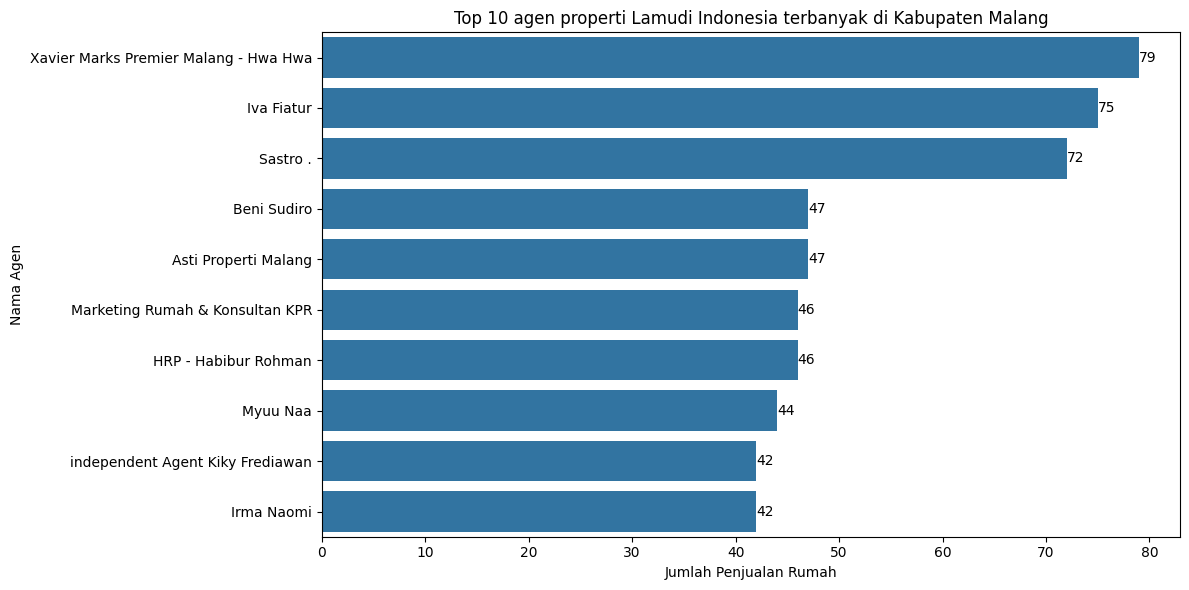

In [44]:
top_10_agent = df['agent_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_agent.values, y=top_10_agent.index, orient='h')
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=10)
plt.title('Top 10 agen properti Lamudi Indonesia terbanyak di Kabupaten Malang')
plt.xlabel('Jumlah Penjualan Rumah')
plt.ylabel('Nama Agen')
plt.tight_layout()
plt.show()

- Hwa Hwa merupakan agen Xavier Marks Premier Malang dan berstatus rekan lamudi sejak 2021.
- Iva fiatur merupakan agen Xavier Marks Premier Malang dan berstatus rekan lamudi pro sejak 2021.
- Sastro merupakan agen Almahira Properti Malang dan berstatus rekan lamudi pro sejak 2015.
- Beni Sudiro merupakan agen Independent Agent dan berstatus rekan lamudi pro sejak 2017.
- Asti Properti Malang merupakan agen Diamond Properti dan berstatus rekan lamudi sejak 2022.
- Marketing Rumah & Konsultan KPR berstatus agen rekan lamudi pro.
- Habibur Rohman merupakan agen Habibur Rohman Property dan berstatus rekan lamudi sejak 2021.
- Myuu Naa merupakan agen rumah.malangbatu dan berstatus rekan lamudi sejak 2020.
- Kiky Frediawan merupakan agen PROPERTi 81. Berstatus agent karena belum proses verifikasi di lamudi. Agen ini anggota sejak 2023.
- Irma Naomi merupakan agen Xavier Marks Premiere Malang dan berstatus rekan lamudi sejak 2022.

Perbandingan banyaknya status agen rekan lamudi.co.id Kabupaten Malang

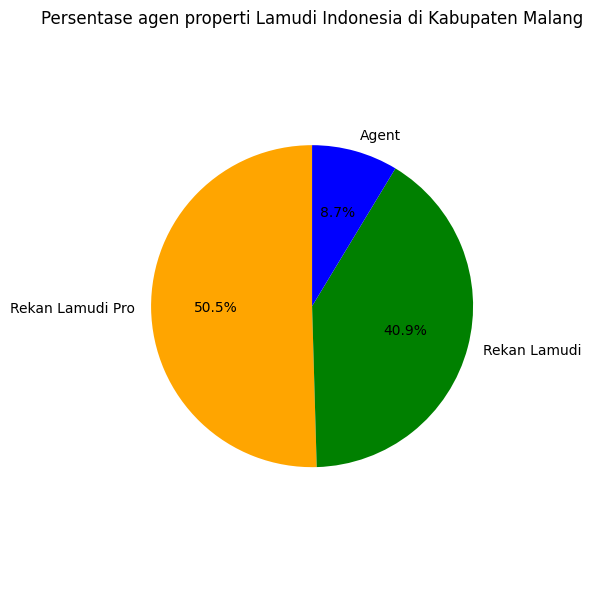

In [45]:
agent_status_count = df['agent_status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(agent_status_count, labels=agent_status_count.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'green', 'blue'])
plt.title('Persentase agen properti Lamudi Indonesia di Kabupaten Malang')
plt.axis('equal')
plt.tight_layout()
plt.show()

Agen rekan lamudi pro menempati posisi pertama terbanyak dengan jumlah 50.5%, kemudian disusul rekan lamudi dengan jumlah 40.9%. Kedua status ini sudah terverifikasi oleh lamudi.co.id. Sedangkan Agent hanya status biasa dan belum terverifikasi di lamudi.co.id dengan jumlah 8.7%.

### 5. Bagaimana korelasi penjualan rumah antara harga, luas bangunan, dan luas tanah?

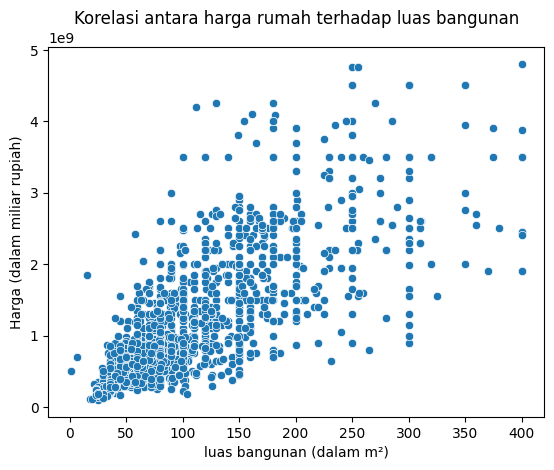

In [46]:
sns.scatterplot(x='luas bangunan', y='price', data=df)
plt.xlabel('luas bangunan (dalam m²)')
plt.ylabel('Harga (dalam miliar rupiah)')
plt.title('Korelasi antara harga rumah terhadap luas bangunan')
plt.show()

Rumah dengan luas bangunan di bawah 150 m² dengan harga rentang hingga 2 miliar rupiah paling banyak. Dengan asumsi bahwa rumah yang untuk hunian luas bangunan rentang 25 m² hingga 150 m² merupakan mayoritas untuk diperjual belikan dan harga yang ditawarkan terjangkau untuk calon pembeli.

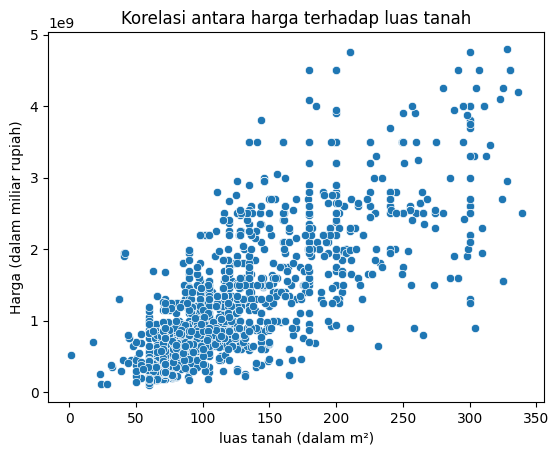

In [47]:
# Scatter plot harga vs luas_tanah
sns.scatterplot(x='luas lahan', y='price', data=df)
plt.xlabel('luas tanah (dalam m²)')
plt.ylabel('Harga (dalam miliar rupiah)')
plt.title('Korelasi antara harga terhadap luas tanah')
plt.show()

Sedangkan rumah dengan luas lahan yang lebih dari 50 m² hingga 150 m² mendominasi di harga rentang hingga 1.5 miliar.

### 6. Bagaimana hubungan antara banyaknya kamar tidur terhadap luas bangunan?

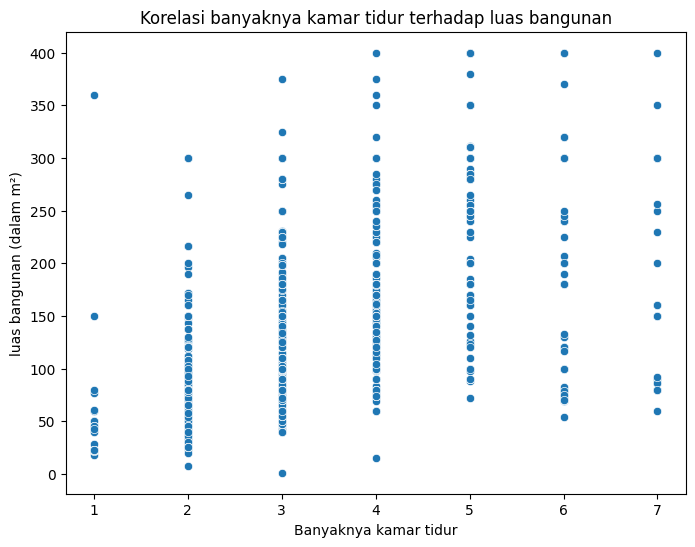

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='kamar tidur', y='luas bangunan', data=df)
plt.xlabel('Banyaknya kamar tidur')
plt.ylabel('luas bangunan (dalam m²)')
plt.title('Korelasi banyaknya kamar tidur terhadap luas bangunan')
plt.show()

Rumah dengan luas bangunan mulai dari 25 m² kebanyakan mempunyai 2 kamar tidur karena luasnya yang kecil. Sedangkan rumah dengan 3 kamar tidur bisa terlihat dengan luas bangunan mulai dari 50 m² ke atas.

## **Conclusion**

Berdasarkan hasil visualisasi di atas, dapat disimpulkan sebagai berikut:
1. harga penjualan rumah di Kabupaten Malang (lamudi.co.id) mulai dari Rp. 100 juta hingga Rp 4.8 miliar.
2. Banyaknya rumah dengan luas bangunan 25 m² hingga 150 m² dengan rentang harga Rp. 100 juta hingga Rp. 2 miliar.
3. Adapun rumah dengan luas bangunan di atas memiliki banyaknya kamar tidur dari 2 - 4 kamar.
4. Mayoritas penjualan rumah yang paling banyak terdapat pada kecamatan Lowokwaru kabupaten Malang dengan jumlah 459 unit. Sedangkan kecamatan Blimbing dan kecamatan Sukun masing-masing dengan jumlah 283 dan 198 unit.
5. Banyaknya agen rekan lamudi karena sudah terverifikasi lamudi.co.id. Dengan persentase rekan lamudi sebanyak 40.9% dan rekan lamudi pro sebanyak 50.5%.
6. Dari banyaknya agen lamudi.co.id yang menjual properti rumah, ternyata banyak agen-agen properti di luar lamudi.co.id dimana salah satunya adalah Xavier Marks Premier Malang yang merupakan agen properti terbesar di Malang dan mempunyai perkantoran.

## **Ekspor Dataset Hasil Cleaning & Analysis untuk dijadikan dashboard pada Streamlit**

In [49]:
df.to_csv('data/lamudi_malang_cleaned_data.csv', index=False)